CNN with CIFAR-10 dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
# CIFAR-10 Dataset: A predefined dataset of 60,000 color images across 10 classes.
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


c:\Users\Yugesh\anaconda3\envs\tf_gpu_env\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
c:\Users\Yugesh\anaconda3\envs\tf_gpu_env\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


CIFAR-10 dataset, which contains 60,000 32x32 color images in 10 classes.

## Normalize Pixel Values

### Pixel Range Before Normalization
Each pixel in an image typically has a value between **0 and 255**  
(for RGB channels, where:

- **0** → black  
- **255** → full intensity  

)

---

### Normalization Process
To normalize, divide every pixel value by **255**:

$$
\text{Normalized Pixel} = \frac{\text{Pixel Value}}{255}
$$

Examples:

- Pixel value **0** →  
  $$
  \frac{0}{255} = 0.0
  $$

- Pixel value **255** →  
  $$
  \frac{255}{255} = 1.0
  $$

- Pixel value **128** →  
  $$
  \frac{128}{255} \approx 0.502
  $$

---

### Normalized Range
After normalization, all pixel values lie in the range: [0, 1]


In [17]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


Labels are one-hot encoded.

In [27]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [19]:
y_train[0]

array([6], dtype=uint8)

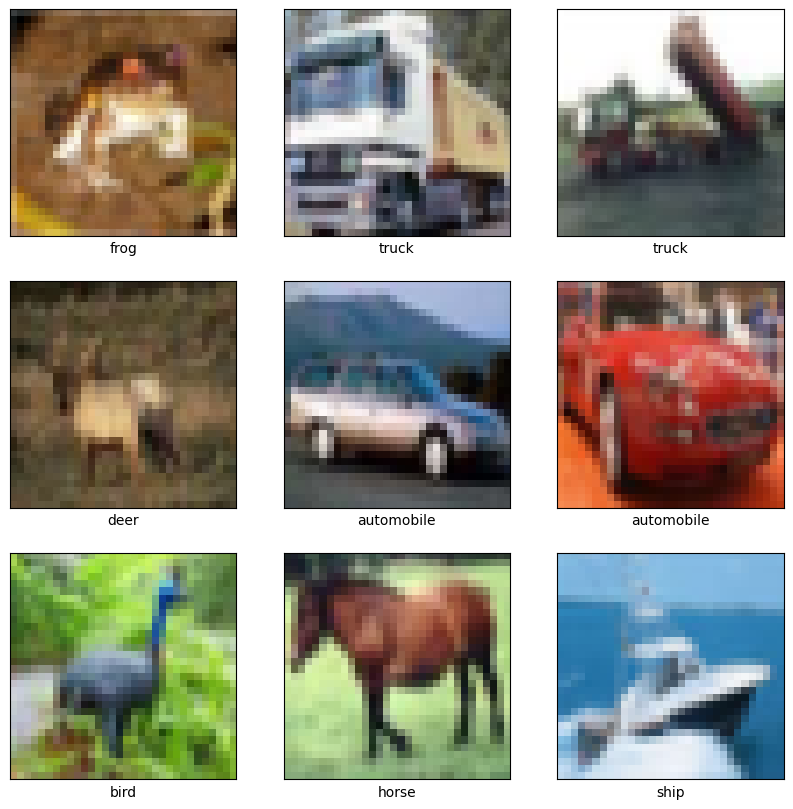

In [30]:
# Visualize some images from the dataset
# Displays 25 random images from the training set in a 5x5 grid.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
# This line creates a figure (i.e., the plot window) with a size of 10x10 inches.
# The size defines the overall space available for displaying the images in the grid.
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    # Removes the tick marks on the x-axis and y-axis for a cleaner visualization.
    plt.grid(False)
    # Disables the grid lines in the subplot for better aesthetics.
    plt.imshow(x_train[i], interpolation='nearest')
    # Displays the ith image from the training dataset (x_train).
    # Each image in x_train is a 32x32 RGB image.
    plt.xlabel(class_names[y_train[i].argmax()])
    # Adds a label below the image to indicate its class name.
plt.show()

#  The images may appear blurry because the CIFAR-10 dataset consists of low-resolution
# images (32x32 pixels), which can look unclear when scaled up for display in a larger size.

The CNN has three convolutional layers with ReLU activation, followed by max-pooling layers. After flattening the output, a dense layer and an output layer with softmax activation are added.

In [5]:
# Build the CNN model
model = models.Sequential([
    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation='relu'),

    # Output layer
    layers.Dense(10, activation='softmax')
])


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

The model is compiled with the Adam optimizer and categorical cross-entropy loss. Training is performed over 10 epochs with a batch size of 64.

In [7]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 18s 8ms/step - loss: 1.5734 - accuracy: 0.4255 - val_loss: 1.3069 - val_accuracy: 0.5373
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 1.2142 - accuracy: 0.5696 - val_loss: 1.2235 - val_accuracy: 0.5690
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 1.0578 - accuracy: 0.6272 - val_loss: 1.0364 - val_accuracy: 0.6363
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9651 - accuracy: 0.6627 - val_loss: 1.1585 - val_accuracy: 0.5876
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.8848 - accuracy: 0.6884 - val_loss: 0.9592 - val_accuracy: 0.6681
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.8245 - accuracy: 0.7112 - val_loss: 0.8995 - val_accuracy: 0.6901
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.7713 - accuracy: 0.7304 - val_loss: 0.8896 - val_accuracy: 0.6917
Epoch

The model's performance is evaluated on the test set.

In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")


313/313 [==============================] - 1s 3ms/step - loss: 0.8485 - accuracy: 0.7130
Test accuracy: 0.71


1/1 [==============================] - 0s 25ms/step
[[1.25257112e-02 2.41637835e-03 6.84454432e-03 6.89438343e-01
  3.06886970e-03 2.62912422e-01 1.27831055e-02 1.68929482e-03
  7.67472945e-03 6.46474480e-04]]


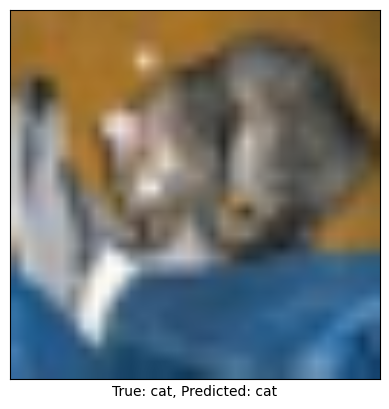

In [28]:
# Predict a single image from the test set
def predict_single_image(index):
    image = x_test[index]
    true_label = np.argmax(y_test[index])
    prediction = model.predict(image.reshape(1, 32, 32, 3))
    print(prediction)
    predicted_label = np.argmax(prediction)

    # Display the image with predictions
    plt.imshow(image,interpolation='bilinear')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"True: {class_names[true_label]}, Predicted: {class_names[predicted_label]}")
    plt.show()

# Example usage
predict_single_image(0)
